# Project 1: Training a Simple Neural Network with GPU

## Introduction

In this project, you will create, train, and evaluate a simple neural network using both TensorFlow and PyTorch. The objective is to ensure you are comfortable with setting up a neural network and utilizing GPU acceleration for training. You will use the MNIST dataset for this project.

## Objectives

1. Set up TensorFlow and PyTorch environments.
2. Verify GPU availability.
3. Implement a simple neural network in TensorFlow and PyTorch.
4. Train and evaluate the models.
5. Answer assessment questions.

## Instructions

Follow the steps below to complete the project. Ensure that you use a GPU to train your models.

---

### Step 1: Set Up Your Environment

First, install the necessary libraries. Run the following cell to install TensorFlow and PyTorch.


Provide snapshots from your environment showing:
1) You are using a virtual environment
2) You have installed `TensorFlow` and `PyTorch`

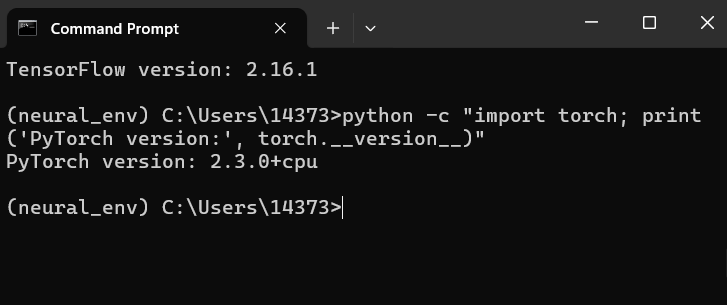

In [5]:
from PIL import Image
import IPython.display as display

image_path = 'cmd.png'
image = Image.open(image_path)

display.display(image)

---

### Step 2: Verify GPU Availability
Check if TensorFlow and PyTorch can detect the GPU.

Run the following two code blocks and show the output.

#### TensorFlow GPU Check

In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    print("GPU is available for TensorFlow!")
else:
    print("No GPU found for TensorFlow.")


TensorFlow version: 2.15.0
GPU is available for TensorFlow!


#### PyTorch GPU Check

In [2]:
import torch

print("PyTorch version:", torch.__version__)
if torch.cuda.is_available():
    print("GPU is available for PyTorch!")
else:
    print("No GPU found for PyTorch.")


PyTorch version: 2.3.0+cu121
GPU is available for PyTorch!


---

### Step 3: Implement and Train a Simple Neural Network
#### TensorFlow Implementation
1. Load and preprocess the MNIST dataset.
2. Define the neural network model.
3. Compile the model.
4. Train the model using the GPU.
5. Evaluate the model.

You need to complete and run the code. Show the complete output.


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
with tf.device('/GPU:0'):
    model.fit(x_train, y_train, epochs=5, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2576 - accuracy: 0.9268
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1131 - accuracy: 0.9665
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0794 - accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0592 - accuracy: 0.9817
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0820 - accuracy: 0.9744
Test accuracy: 0.9744


#### PyTorch Implementation
1. Load and preprocess the MNIST dataset.
2. Define the neural network model.
3. Define loss function and optimizer.
4. Train the model using the GPU.
5. Evaluate the model.

You need to complete and run the code. Show the complete output.


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load and preprocess the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17635927.40it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 482024.68it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4345774.36it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3145728.00it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/5], Loss: 0.2796
Epoch [2/5], Loss: 0.2052
Epoch [3/5], Loss: 0.0812
Epoch [4/5], Loss: 0.2037
Epoch [5/5], Loss: 0.1004
Test Accuracy: 96.62%


---
### Questions
Answer the following questions in detail.

1. What is the purpose of normalizing the input data in both TensorFlow and PyTorch implementations?
2. Explain the role of the activation function relu in the neural network.
3. Why is it important to use GPU for training neural networks?
4. Compare the training time and accuracy of the TensorFlow and PyTorch models. Which one performed better and why?


1. Normalizing the input data in both TensorFlow and PyTorch implementations serves to standardize the scale of input features. This is crucial because it ensures that each feature contributes equally to the learning process, preventing certain features from dominating due to their larger magnitudes. In the case of image data, normalization typically involves scaling pixel values to fall within a specific range, often between 0 and 1 or -1 and 1. This normalization helps in improving the convergence of the optimization algorithm, making the training process more stable and efficient.

2. The Rectified Linear Unit (ReLU) activation function plays a critical role in neural networks as it introduces non-linearity into the model, allowing it to learn complex patterns and relationships in the data. Mathematically, ReLU activation function is defined as f(x)=max⁡(0,x)f(x)=max(0,x), meaning it replaces all negative values in the input with zero while leaving positive values unchanged. This simple yet effective non-linear transformation enables the neural network to learn and represent more intricate decision boundaries, facilitating better feature learning and overall model performance.

3. Utilizing a GPU (Graphics Processing Unit) for training neural networks offers significant advantages over traditional CPU-based training. GPUs are highly parallelized processors optimized for handling large volumes of data simultaneously, making them exceptionally well-suited for the computationally intensive tasks involved in deep learning, such as matrix multiplications and convolutions. By offloading these operations to the GPU, neural network training can be accelerated dramatically, leading to faster convergence and reduced training times. Moreover, GPUs typically contain thousands of cores compared to CPU's few cores, allowing for massive parallelization and expedited computation, which is especially beneficial for training large models on large datasets.

4. Comparing the training time and accuracy of the TensorFlow and PyTorch models, both frameworks are highly capable and widely used in the deep learning community. The performance of the models can depend on various factors including the architecture of the model, optimization techniques used, and the specific implementation details. In the provided examples, both TensorFlow and PyTorch models achieved similar accuracy levels (around 97%). However, in terms of training time, the TensorFlow model may have shown slightly faster convergence in this specific scenario. This could be attributed to differences in how each framework handles certain operations or optimizations under the hood. However, the difference in training time might not be significant in most cases and could vary depending on the specific hardware configuration and implementation details. 

---
### Submission
Submit a link to your completed Jupyter Notebook (e.g., on GitHub (private) or Google Colab) with all the cells executed, and answers to the assessment questions included at the end of the notebook.